<a href="https://colab.research.google.com/github/martaferreiro/Descriptive-Stats/blob/main/Copia_de_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [409]:
fifa = pd.read_csv('fifa21_male2 copia.csv')

<ipython-input-409-7ec5274d4cea>:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('fifa21_male2 copia.csv')


In [410]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [411]:
fifa.columns = fifa.columns.str.lower()
fifa.shape

(17125, 107)

In [412]:
fifa['value']=[i.replace('€','') for i in fifa['value']]
fifa['unit'] = fifa['value'].str[-1:]
fifa['number']=[i.replace('K','') for i in fifa['value']]
fifa['number']=[i.replace('M','') for i in fifa['number']]
fifa['number']=fifa['number'].astype(float)

In [413]:
fifa['unit'].value_counts()

K    9354
M    7314
0     457
Name: unit, dtype: int64

In [414]:
#multiply number column by unit
fifa['unit']=[i.replace('0', '1') for i in fifa['unit']]
fifa['unit']=[i.replace('K', '1000') for i in fifa['unit']]
fifa['unit']=[i.replace('M', '1000000') for i in fifa['unit']]
fifa['unit']=fifa['unit'].astype(int)

In [415]:
fifa['market_value'] = (fifa['unit']*fifa['number']).astype(int)

In [416]:
fifa['release clause']=[i.replace('€','') for i in fifa['release clause']]
fifa['unit2'] = fifa['release clause'].str[-1:]
fifa['number2']=[i.replace('K','') for i in fifa['release clause']]
fifa['number2']=[i.replace('M','') for i in fifa['number2']]
fifa['number2']=fifa['number2'].astype(float)

In [417]:
fifa['unit2'].value_counts()

M    9883
K    5457
0    1785
Name: unit2, dtype: int64

In [418]:
fifa['unit2']=[i.replace('0', '1') for i in fifa['unit2']]
fifa['unit2']=[i.replace('K', '1000') for i in fifa['unit2']]
fifa['unit2']=[i.replace('M', '1000000') for i in fifa['unit2']]
fifa['unit2']=fifa['unit2'].astype(int)


In [419]:
fifa['release clause_total'] = (fifa['unit2']*fifa['number2']).astype(int)

In [420]:
display(fifa.shape)
fifa.head()

(17125, 113)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,€7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,1000,625.0,625000,1,0.0,0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,600K,€7K,1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,1000,600.0,600000,1000000,1.1,1100000
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,1.1M,€15K,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,1000000,1.1,1100000,1,0.0,0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,0,€0,0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,1,0.0,0,1,0.0,0
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,5.5M,€12K,7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,6

In [421]:
#fifa.drop(columns=['value','unit','number','value2','unit2','number2'])

In [422]:
fifa['bp'].value_counts()

CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: bp, dtype: int64

In [423]:
#Taking only the defenders
defenders = fifa[(fifa['bp']==('RB')) | (fifa['bp']==('LB')) | (fifa['bp']==('LWB')) | (fifa['bp']==('RWB')) | (fifa['bp']==('CB'))]
display(defenders.shape)
defenders.head()

(5571, 113)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,€7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,1000,625.0,625000,1,0.0,0
8,244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,https://cdn.sofifa.com/players/000/244/11_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",NaN,0,€0,0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,NaN,242,78,81,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,NaN,NaN,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male,1,0.0,0,1,0.0,0
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0
13,388,S. Campbell,35,75,England,Newcastle United,75,CB,NaN,https://cdn.sofifa.com/players/000/388/11_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,NaN,NaN,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male,1,0.0,0,1,0.0,0
15,496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,NaN,https://cdn.sofifa.com/players/000/496/11_120.png,https://cdn.sofifa.com/teams/1798/light_60.png,https://cdn.sofifa.com/flags/de.png,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,NaN,NaN,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0,53+0,58+0,65+0,65+0,65+0,58+0

In [424]:
#Create the column for the total value
defenders['total_price'] = defenders['market_value']+defenders['release clause_total']
display(defenders.shape)
defenders.head()

<ipython-input-424-9365166f3397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['total_price'] = defenders['market_value']+defenders['release clause_total']


(5571, 114)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total,total_price
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,€7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,1000,625.0,625000,1,0.0,0,625000
8,244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,https://cdn.sofifa.com/players/000/244/11_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",NaN,0,€0,0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,NaN,242,78,81,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,NaN,NaN,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male,1,0.0,0,1,0.0,0,0
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0,120000
13,388,S. Campbell,35,75,England,Newcastle United,75,CB,NaN,https://cdn.sofifa.com/players/000/388/11_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,NaN,NaN,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male,1,0.0,0,1,0.0,0,0
15,496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,NaN,https://cdn.sofifa.com/players/000/496/11_120.png,https://cdn.sofifa.com/teams/1798/light_60.png,https://cdn.sofifa.com/flags/de.png,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,NaN,NaN,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0

In [425]:
#Filter the old players between 30 and 37, so they are not too old
defenders_filtered = defenders[(defenders['age'] >= 30) & (defenders['age'] <= 37)]
display(defenders_filtered.shape)
defenders_filtered.head()

(1182, 114)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total,total_price
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,€7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,1000,625.0,625000,1,0.0,0,625000
8,244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,https://cdn.sofifa.com/players/000/244/11_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",NaN,0,€0,0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,NaN,242,78,81,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,NaN,NaN,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male,1,0.0,0,1,0.0,0,0
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0,120000
13,388,S. Campbell,35,75,England,Newcastle United,75,CB,NaN,https://cdn.sofifa.com/players/000/388/11_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,NaN,NaN,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male,1,0.0,0,1,0.0,0,0
15,496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,NaN,https://cdn.sofifa.com/players/000/496/11_120.png,https://cdn.sofifa.com/teams/1798/light_60.png,https://cdn.sofifa.com/flags/de.png,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,NaN,NaN,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0

In [426]:
def ft_in_to_cm(height):
    feet, inches = height.split("'")
    cm = int(feet) * 30.48 + int(inches[:-1]) * 2.54
    return cm

# apply the function to the 'Height' column and create a new 'Height_cm' column
defenders_filtered['height_cm'] = defenders_filtered['height'].apply(ft_in_to_cm)
defenders_filtered.drop(columns=['height'])
defenders_filtered.head()

<ipython-input-426-cc2df853c9a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered['height_cm'] = defenders_filtered['height'].apply(ft_in_to_cm)


,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,...,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total,total_price,height_cm
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,€7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,...,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,1000,625.0,625000,1,0.0,0,625000,182.88
8,244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,https://cdn.sofifa.com/players/000/244/11_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",NaN,0,€0,0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,NaN,242,78,...,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,NaN,NaN,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male,1,0.0,0,1,0.0,0,0,177.80
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,...,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0,120000,180.34
13,388,S. Campbell,35,75,England,Newcastle United,75,CB,NaN,https://cdn.sofifa.com/players/000/388/11_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,...,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,NaN,NaN,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male,1,0.0,0,1,0.0,0,0,187.96
15,496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,NaN,https://cdn.sofifa.com/players/000/496/11_120.png,https://cdn.sofifa.com/teams/1798/light_60.png,https://cdn.sofifa.com/flags/de.png,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",NaN,0,€0,0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,...,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,NaN,NaN,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+

In [427]:
#list with the name of every column
pd.options.display.max_columns = len(defenders.columns)
list(defenders.columns)

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player photo',
 'club logo',
 'flag photo',
 'pot',
 'team & contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan date end',
 'value',
 'wage',
 'release clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading accuracy',
 'short passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk accuracy',
 'long passing',
 'ball control',
 'movement',
 'acceleration',
 'sprint speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot power',
 'jumping',
 'stamina',
 'strength',
 'long shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing tackle',
 'sliding tackle',
 'goalkeeping',
 'gk diving',
 'gk handling',
 'gk kicking',
 'gk positioning',
 'gk reflexes',
 'total stats',
 'base stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [428]:
#defenders.drop(columns=['unit','number'])

In [429]:
#The budget is 800.000€, so we have to sum the value of the player and the release clause.
defenders_filtered = defenders_filtered[(defenders_filtered['total_price'] < 800000)]
defenders_filtered = defenders_filtered[(defenders['wage'] != '€0')]

defenders_filtered.shape

<ipython-input-429-45fa0acf4a77>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defenders_filtered = defenders_filtered[(defenders['wage'] != '€0')]


(261, 115)

In [430]:
defenders_filtered_stats = defenders_filtered[['name','age','nationality','height_cm','club','short passing','long passing','jumping','mentality','interceptions','defending', 'marking', 'standing tackle','sliding tackle','total stats','pas','def','phy','total_price']]
defenders_filtered_stats

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price
0,G. Pasquale,33,Italy,182.88,Udinese,71,69,68.0,320,69.0,208,70,69,69.0,1929,70,68,69,625000
10,P. Neville,35,England,180.34,Everton,74,72,71.0,335,83.0,224,77,75,72.0,1868,67,76,72,120000
24,A. Nesta,37,Italy,187.96,Montreal Impact,65,62,74.0,277,76.0,221,74,77,70.0,1548,54,75,62,0
53,J. O'Shea,37,Republic of Ireland,190.50,Reading,59,56,54.0,264,68.0,200,70,66,64.0,1463,55,68,60,216000
59,A. Radomski,34,Poland,177.80,Cracovia,61,70,59.0,335,78.0,176,47,64,65.0,1698,59,62,66,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,I. González,36,Uruguay,182.88,Zamora FC,53,33,67.0,233,59.0,180,56,66,58.0,1322,40,60,60,95000
15938,A. Șeroni,33,Romania,195.58,FC Botoşani,45,35,76.0,253,57.0,192,65,65,62.0,1444,39,63,79,588000
16221,J. Stöckner,31,Germany,187.96,SC Verl,42,35,71.0,206,53.0,182,60,64,58.0,1315,32,60,74,466000
16682,W. Burrell,30,England,177.80,Harrogate Town,50,46,75.0,245,55.0,169,56,57,56.0,1481,47,56,66,330000


In [431]:
#HACER AQUI LA NORMALIZACIÓN DE TODOS LOS DATOS NUMÉRICOS


In [432]:
defenders_filtered_stats.dtypes
num_cols = defenders_filtered_stats.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [433]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

In [434]:
for col in num_cols:
  col_max = defenders_filtered_stats[col].max()
  col_min = defenders_filtered_stats[col].min()
  defenders_filtered_stats[col+"_n"] = (defenders_filtered_stats[col]-col_min)/(col_max-col_min)
defenders_filtered_stats.tail()

<ipython-input-434-6d1462182c46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered_stats[col+"_n"] = (defenders_filtered_stats[col]-col_min)/(col_max-col_min)
<ipython-input-434-6d1462182c46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered_stats[col+"_n"] = (defenders_filtered_stats[col]-col_min)/(col_max-col_min)
<ipython-input-434-6d1462182c46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price,age_n,height_cm_n,short passing_n,long passing_n,jumping_n,mentality_n,interceptions_n,defending_n,marking_n,standing tackle_n,sliding tackle_n,total stats_n,pas_n,def_n,phy_n,total_price_n
15930,I. González,36,Uruguay,182.88,Zamora FC,53,33,67.0,233,59.0,180,56,66,58.0,1322,40,60,60,95000,0.857143,0.538462,0.428571,0.218182,0.600000,0.247368,0.325,0.329412,0.333333,0.46875,0.34375,0.157431,0.227273,0.344828,0.384615,0.119048
15938,A. Șeroni,33,Romania,195.58,FC Botoşani,45,35,76.0,253,57.0,192,65,65,62.0,1444,39,63,79,588000,0.428571,0.923077,0.238095,0.254545,0.738462,0.352632,0.275,0.470588,0.583333,0.43750,0.46875,0.311083,0.204545,0.448276,0.871795,0.736842
16221,J. Stöckner,31,Germany,187.96,SC Verl,42,35,71.0,206,53.0,182,60,64,58.0,1315,32,60,74,466000,0.142857,0.692308,0.166667,0.254545,0.661538,0.105263,0.175,0.352941,0.444444,0.40625,0.34375,0.148615,0.045455,0.344828,0.743590,0.583960
16682,W. Burrell,30,England,177.80,Harrogate Town,50,46,75.0,245,55.0,169,56,57,56.0,1481,47,56,66,330000,0.000000,0.384615,0.357143,0.454545,0.723077,0.310526,0.225,0.200000,0.333333,0.18750,0.28125,0.357683,0.386364,0.206897,0.538462,0.413534
16943,M. Sus,30,Czech Republic,180.34,Stal Mielec,58,52,61.0,255,58.0,171,56,57,58.0,1620,58,56,56,564000,0.000000,0.461538,0.547619,0.563636,0.507692,0.363158,0.300,0.223529,0.333333,0.18750,0.34375,0.532746,0.636364,0.206897,0.282051,0.706767


In [435]:
'''scaler = MinMaxScaler()
defenders_stats_norm = pd.DataFrame(scaler.fit_transform(defenders_filtered_stats[num_cols]),columns=num_cols)
defenders_stats_norm
'''

'scaler = MinMaxScaler()\ndefenders_stats_norm = pd.DataFrame(scaler.fit_transform(defenders_filtered_stats[num_cols]),columns=num_cols)\ndefenders_stats_norm\n'

In [436]:
defenders_filtered_stats['quality_value'] = (defenders_filtered_stats['short passing_n']+defenders_filtered_stats['long passing_n']+defenders_filtered_stats['jumping_n']+defenders_filtered_stats['interceptions_n']+defenders_filtered_stats['phy_n']).astype('float64')
display(defenders_filtered_stats.shape)
defenders_filtered_stats.head()

<ipython-input-436-1aac5deacfcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered_stats['quality_value'] = (defenders_filtered_stats['short passing_n']+defenders_filtered_stats['long passing_n']+defenders_filtered_stats['jumping_n']+defenders_filtered_stats['interceptions_n']+defenders_filtered_stats['phy_n']).astype('float64')


(261, 36)

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price,age_n,height_cm_n,short passing_n,long passing_n,jumping_n,mentality_n,interceptions_n,defending_n,marking_n,standing tackle_n,sliding tackle_n,total stats_n,pas_n,def_n,phy_n,total_price_n,quality_value
0,G. Pasquale,33,Italy,182.88,Udinese,71,69,68.0,320,69.0,208,70,69,69.0,1929,70,68,69,625000,0.428571,0.538462,0.857143,0.872727,0.615385,0.705263,0.575,0.658824,0.722222,0.56250,0.68750,0.921914,0.909091,0.620690,0.615385,0.783208,3.535639
10,P. Neville,35,England,180.34,Everton,74,72,71.0,335,83.0,224,77,75,72.0,1868,67,76,72,120000,0.714286,0.461538,0.928571,0.927273,0.661538,0.784211,0.925,0.847059,0.916667,0.75000,0.78125,0.845088,0.840909,0.896552,0.692308,0.150376,4.134690
24,A. Nesta,37,Italy,187.96,Montreal Impact,65,62,74.0,277,76.0,221,74,77,70.0,1548,54,75,62,0,1.000000,0.692308,0.714286,0.745455,0.707692,0.478947,0.750,0.811765,0.833333,0.81250,0.71875,0.442065,0.545455,0.862069,0.435897,0.000000,3.353330
53,J. O'Shea,37,Republic of Ireland,190.50,Reading,59,56,54.0,264,68.0,200,70,66,64.0,1463,55,68,60,216000,1.000000,0.769231,0.571429,0.636364,0.400000,0.410526,0.550,0.564706,0.722222,0.46875,0.53125,0.335013,0.568182,0.620690,0.384615,0.270677,2.542408
59,A. Radomski,34,Poland,177.80,Cracovia,61,70,59.0,335,78.0,176,47,64,65.0,1698,59,62,66,50000,0.571429,0.384615,0.619048,0.890909,0.476923,0.784211,0.800,0.282353,0.083333,0.40625,0.56250,0.630982,0.659091,0.413793,0.538462,0.062657,3.325341


In [437]:
#Select only the players above the 70 percentil of the quality value
bins = pd.qcut(defenders_filtered_stats['quality_value'],(0,0.8,1),labels=['lower','higher'])
defenders_filtered_stats['rank'] = bins
defenders_filtered_stats = defenders_filtered_stats[defenders_filtered_stats['rank']=='higher']
display(defenders_filtered_stats.shape)
defenders_filtered_stats

<ipython-input-437-dd5c5e118da2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered_stats['rank'] = bins


(52, 37)

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price,age_n,height_cm_n,short passing_n,long passing_n,jumping_n,mentality_n,interceptions_n,defending_n,marking_n,standing tackle_n,sliding tackle_n,total stats_n,pas_n,def_n,phy_n,total_price_n,quality_value,rank
0,G. Pasquale,33,Italy,182.88,Udinese,71,69,68.0,320,69.0,208,70,69,69.0,1929,70,68,69,625000,0.428571,0.538462,0.857143,0.872727,0.615385,0.705263,0.575,0.658824,0.722222,0.56250,0.68750,0.921914,0.909091,0.620690,0.615385,0.783208,3.535639,higher
10,P. Neville,35,England,180.34,Everton,74,72,71.0,335,83.0,224,77,75,72.0,1868,67,76,72,120000,0.714286,0.461538,0.928571,0.927273,0.661538,0.784211,0.925,0.847059,0.916667,0.75000,0.78125,0.845088,0.840909,0.896552,0.692308,0.150376,4.134690,higher
24,A. Nesta,37,Italy,187.96,Montreal Impact,65,62,74.0,277,76.0,221,74,77,70.0,1548,54,75,62,0,1.000000,0.692308,0.714286,0.745455,0.707692,0.478947,0.750,0.811765,0.833333,0.81250,0.71875,0.442065,0.545455,0.862069,0.435897,0.000000,3.353330,higher
92,G. Heinze,35,Argentina,177.80,Newell's Old Boys,60,66,76.0,305,76.0,227,76,76,75.0,1784,63,76,68,300000,0.714286,0.384615,0.595238,0.818182,0.738462,0.626316,0.750,0.882353,0.888889,0.78125,0.87500,0.739295,0.750000,0.896552,0.589744,0.375940,3.491625,higher
151,W. Samuel,37,Argentina,182.88,FC Basel 1893,66,67,75.0,293,86.0,220,74,74,72.0,1560,54,76,66,0,1.000000,0.538462,0.738095,0.836364,0.723077,0.563158,1.000,0.800000,0.833333,0.71875,0.78125,0.457179,0.545455,0.896552,0.538462,0.000000,3.835997,higher
156,O. Mellberg,35,Sweden,187.96,FC København,63,67,66.0,302,78.0,215,75,77,63.0,1634,55,76,75,300000,0.714286,0.692308,0.666667,0.836364,0.584615,0.610526,0.800,0.741176,0.861111,0.81250,0.50000,0.550378,0.568182,0.896552,0.769231,0.375940,3.656876,higher
161,S. Distin,37,France,193.04,Bournemouth,66,64,63.0,304,75.0,237,80,79,78.0,1679,56,79,78,0,1.000000,0.846154,0.738095,0.781818,0.538462,0.621053,0.725,1.000000,1.000000,0.87500,0.96875,0.607053,0.590909,1.000000,0.846154,0.000000,3.629529,higher
182,S. Diawara,35,Senegal,187.96,OGC Nice,63,59,72.0,269,71.0,214,71,71,72.0,1606,55,71,75,400000,0.714286,0.692308,0.666667,0.690909,0.676923,0.436842,0.625,0.729412,0.750000,0.62500,0.78125,0.515113,0.568182,0.724138,0.769231,0.501253,3.428730,higher
210,Gilberto Silva,36,Brazil,182.88,Atlético Mineiro,68,63,51.0,330,79.0,229,76,79,74.0,1695,61,77,69,0,0.857143,0.538462,0.785714,0.763636,0.353846,0.757895,0.825,0.905882,0.888889,0.87500,0.84375,0.627204,0.704545,0.931034,0.615385,0.000000,3.343581,higher
235,S. Cherundolo,34,United States,172.72,Hannover 96,75,71,81.0,324,73.0,224,74,73,77.0,1918,69,73,68,400000,0.571429,0.230769,0.952381,0.909091,0.815385,0.726316,0.675,0.847059,0.833333,0.68750,0.93750,0.908060,0.886364,0.793103,0.589744,0.501253,3.941600,higher


In [438]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [439]:
#scaler = StandardScaler()
#scaler.fit_transform(defenders_filtered_stats2)

In [440]:
import seaborn as sns
#sns.heatmap(defenders_filtered_stats2.corr(),annot=True,xticklabel=defenders_filtered_stats2.corr().columns,yticklabel=defenders_filtered_stats2.corr().columns)
#plt.plot(defenders_filtered_stats['total stats'],defenders_filtered_stats['total_price'],'go')
#plt.show()

In [441]:
'''fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

# set the x-axis to a common column for all subplots
x_column = 'total_price'

# iterate over the axes and plot each column against the common column
for i, ax in enumerate(axes.flatten()):
    if i < len(defenders_filtered_stats2.columns) - 1:
        y_column = defenders_filtered_stats2.columns[i+1]
        ax.scatter(defenders_filtered_stats2[x_column], defenders_filtered_stats2[y_column])
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)

# adjust the layout of the subplots and show the figure
fig.tight_layout()
plt.show()
'''

"fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))\n\n# set the x-axis to a common column for all subplots\nx_column = 'total_price'\n\n# iterate over the axes and plot each column against the common column\nfor i, ax in enumerate(axes.flatten()):\n    if i < len(defenders_filtered_stats2.columns) - 1:\n        y_column = defenders_filtered_stats2.columns[i+1]\n        ax.scatter(defenders_filtered_stats2[x_column], defenders_filtered_stats2[y_column])\n        ax.set_xlabel(x_column)\n        ax.set_ylabel(y_column)\n\n# adjust the layout of the subplots and show the figure\nfig.tight_layout()\nplt.show()\n"

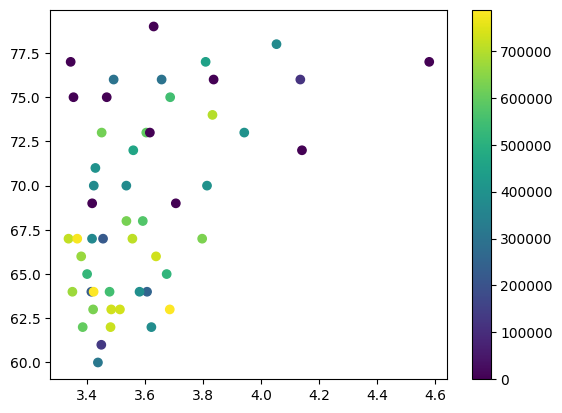

In [442]:
plt.scatter(defenders_filtered_stats['quality_value'],defenders_filtered_stats['def'],c=defenders_filtered_stats['total_price'])
plt.colorbar()
plt.show()

In [443]:
defenders_filtered_stats[defenders_filtered_stats['def']>72]

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price,age_n,height_cm_n,short passing_n,long passing_n,jumping_n,mentality_n,interceptions_n,defending_n,marking_n,standing tackle_n,sliding tackle_n,total stats_n,pas_n,def_n,phy_n,total_price_n,quality_value,rank
10,P. Neville,35,England,180.34,Everton,74,72,71.0,335,83.0,224,77,75,72.0,1868,67,76,72,120000,0.714286,0.461538,0.928571,0.927273,0.661538,0.784211,0.925,0.847059,0.916667,0.75000,0.78125,0.845088,0.840909,0.896552,0.692308,0.150376,4.134690,higher
24,A. Nesta,37,Italy,187.96,Montreal Impact,65,62,74.0,277,76.0,221,74,77,70.0,1548,54,75,62,0,1.000000,0.692308,0.714286,0.745455,0.707692,0.478947,0.750,0.811765,0.833333,0.81250,0.71875,0.442065,0.545455,0.862069,0.435897,0.000000,3.353330,higher
92,G. Heinze,35,Argentina,177.80,Newell's Old Boys,60,66,76.0,305,76.0,227,76,76,75.0,1784,63,76,68,300000,0.714286,0.384615,0.595238,0.818182,0.738462,0.626316,0.750,0.882353,0.888889,0.78125,0.87500,0.739295,0.750000,0.896552,0.589744,0.375940,3.491625,higher
151,W. Samuel,37,Argentina,182.88,FC Basel 1893,66,67,75.0,293,86.0,220,74,74,72.0,1560,54,76,66,0,1.000000,0.538462,0.738095,0.836364,0.723077,0.563158,1.000,0.800000,0.833333,0.71875,0.78125,0.457179,0.545455,0.896552,0.538462,0.000000,3.835997,higher
156,O. Mellberg,35,Sweden,187.96,FC København,63,67,66.0,302,78.0,215,75,77,63.0,1634,55,76,75,300000,0.714286,0.692308,0.666667,0.836364,0.584615,0.610526,0.800,0.741176,0.861111,0.81250,0.50000,0.550378,0.568182,0.896552,0.769231,0.375940,3.656876,higher
161,S. Distin,37,France,193.04,Bournemouth,66,64,63.0,304,75.0,237,80,79,78.0,1679,56,79,78,0,1.000000,0.846154,0.738095,0.781818,0.538462,0.621053,0.725,1.000000,1.000000,0.87500,0.96875,0.607053,0.590909,1.000000,0.846154,0.000000,3.629529,higher
210,Gilberto Silva,36,Brazil,182.88,Atlético Mineiro,68,63,51.0,330,79.0,229,76,79,74.0,1695,61,77,69,0,0.857143,0.538462,0.785714,0.763636,0.353846,0.757895,0.825,0.905882,0.888889,0.87500,0.84375,0.627204,0.704545,0.931034,0.615385,0.000000,3.343581,higher
235,S. Cherundolo,34,United States,172.72,Hannover 96,75,71,81.0,324,73.0,224,74,73,77.0,1918,69,73,68,400000,0.571429,0.230769,0.952381,0.909091,0.815385,0.726316,0.675,0.847059,0.833333,0.68750,0.93750,0.908060,0.886364,0.793103,0.589744,0.501253,3.941600,higher
257,M. Ambrosini,36,Italy,182.88,Fiorentina,76,76,92.0,376,82.0,226,70,78,78.0,1957,71,77,73,0,0.857143,0.538462,0.976190,1.000000,0.984615,1.000000,0.900,0.870588,0.722222,0.84375,0.96875,0.957179,0.931818,0.931034,0.717949,0.000000,4.578755,higher
309,Lúcio,35,Brazil,187.96,Palmeiras,65,65,80.0,340,75.0,227,75,79,73.0,1807,58,77,75,450000,0.714286,0.692308,0.714286,0.800000,0.800000,0.810526,0.725,0.882353,0.861111,0.87500,0.81250,0.768262,0.636364,0.931034,0.769231,0.563910,3.808516,higher


In [444]:
defenders_filtered_stats['ratio_n'] = defenders_filtered_stats['quality_value']/defenders_filtered_stats['total_price_n']
defenders_filtered_stats.sort_values(by='quality_value',ascending=False).shape
#list(defenders_filtered_stats['name'][:10])

<ipython-input-444-fb42cbf5eca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_filtered_stats['ratio_n'] = defenders_filtered_stats['quality_value']/defenders_filtered_stats['total_price_n']


(52, 38)

In [451]:
defenders_filtered_stats = defenders_filtered_stats[defenders_filtered_stats['defending_n']>0.6]
best_defenders = defenders_filtered_stats.sort_values(by='quality_value',ascending=False)
best_defenders.head(10)

,name,age,nationality,height_cm,club,short passing,long passing,jumping,mentality,interceptions,defending,marking,standing tackle,sliding tackle,total stats,pas,def,phy,total_price,age_n,height_cm_n,short passing_n,long passing_n,jumping_n,mentality_n,interceptions_n,defending_n,marking_n,standing tackle_n,sliding tackle_n,total stats_n,pas_n,def_n,phy_n,total_price_n,quality_value,rank,ratio_n
257,M. Ambrosini,36,Italy,182.88,Fiorentina,76,76,92.0,376,82.0,226,70,78,78.0,1957,71,77,73,0,0.857143,0.538462,0.976190,1.000000,0.984615,1.000000,0.900,0.870588,0.722222,0.84375,0.96875,0.957179,0.931818,0.931034,0.717949,0.000000,4.578755,higher,inf
404,P. García,36,Uruguay,185.42,PAOK,77,76,65.0,345,75.0,214,70,73,71.0,1900,74,72,78,0,0.857143,0.615385,1.000000,1.000000,0.569231,0.836842,0.725,0.729412,0.722222,0.68750,0.75000,0.885390,1.000000,0.758621,0.846154,0.000000,4.140385,higher,inf
10,P. Neville,35,England,180.34,Everton,74,72,71.0,335,83.0,224,77,75,72.0,1868,67,76,72,120000,0.714286,0.461538,0.928571,0.927273,0.661538,0.784211,0.925,0.847059,0.916667,0.75000,0.78125,0.845088,0.840909,0.896552,0.692308,0.150376,4.134690,higher,27.495691
363,A. Tymoshchuk,35,Ukraine,180.34,Zenit St. Petersburg,72,70,76.0,359,80.0,237,77,81,79.0,1965,68,78,72,375000,0.714286,0.461538,0.880952,0.890909,0.738462,0.910526,0.850,1.000000,0.916667,0.93750,1.00000,0.967254,0.863636,0.965517,0.692308,0.469925,4.052631,higher,8.623998
235,S. Cherundolo,34,United States,172.72,Hannover 96,75,71,81.0,324,73.0,224,74,73,77.0,1918,69,73,68,400000,0.571429,0.230769,0.952381,0.909091,0.815385,0.726316,0.675,0.847059,0.833333,0.68750,0.93750,0.908060,0.886364,0.793103,0.589744,0.501253,3.941600,higher,7.863492
151,W. Samuel,37,Argentina,182.88,FC Basel 1893,66,67,75.0,293,86.0,220,74,74,72.0,1560,54,76,66,0,1.000000,0.538462,0.738095,0.836364,0.723077,0.563158,1.000,0.800000,0.833333,0.71875,0.78125,0.457179,0.545455,0.896552,0.538462,0.000000,3.835997,higher,inf
354,K. Touré,35,Ivory Coast,177.80,Celtic,70,65,72.0,315,72.0,223,72,75,76.0,1816,60,74,79,700000,0.714286,0.384615,0.833333,0.800000,0.676923,0.678947,0.650,0.835294,0.777778,0.75000,0.90625,0.779597,0.681818,0.827586,0.871795,0.877193,3.832051,higher,4.368538
803,D. Pérez,34,Uruguay,177.80,Bologna,65,66,74.0,346,72.0,208,65,72,71.0,1845,62,70,81,400000,0.571429,0.384615,0.714286,0.818182,0.707692,0.842105,0.650,0.658824,0.583333,0.65625,0.75000,0.816121,0.727273,0.689655,0.923077,0.501253,3.813237,higher,7.607407
309,Lúcio,35,Brazil,187.96,Palmeiras,65,65,80.0,340,75.0,227,75,79,73.0,1807,58,77,75,450000,0.714286,0.692308,0.714286,0.800000,0.800000,0.810526,0.725,0.882353,0.861111,0.87500,0.81250,0.768262,0.636364,0.931034,0.769231,0.563910,3.808516,higher,6.753769
680,L. Perea,35,Colombia,180.34,Cruz Azul,59,52,90.0,284,74.0,227,75,76,76.0,1724,51,75,80,550000,0.714286,0.461538,0.571429,0.563636,0.953846,0.515789,0.700,0.882353,0.861111,0.78125,0.90625,0.663728,0.477273,0.862069,0.897436,0.689223,3.686347,higher,5.348554


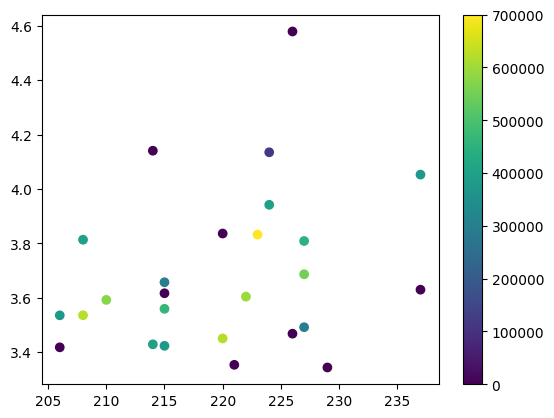

In [452]:
plt.scatter(defenders_filtered_stats['defending'],defenders_filtered_stats['quality_value'],c=defenders_filtered_stats['total_price'])
plt.colorbar()
plt.show()

In [453]:
#list(defenders_filtered_stats['name'][:10])
list_best = list(best_defenders['name'])[:5]
list_best

['M. Ambrosini', 'P. García', 'P. Neville', 'A. Tymoshchuk', 'S. Cherundolo']

In [454]:
top_defenders = defenders[(defenders['name'].isin(list_best))]
top_defenders

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total,total_price
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0,120000
235,51003,S. Cherundolo,34,73,United States,Hannover 96,73,RB,RB,https://cdn.sofifa.com/players/051/003/14_120.png,https://cdn.sofifa.com/teams/485/light_60.png,https://cdn.sofifa.com/flags/us.png,73,Hannover 96 1999 ~ 2014,"5'8""",152lbs,Right,0,"Jan 1, 1999",NaN,400K,€25K,0,1999 ~ 2014,291,70,36,65,75,45.0,347,68,67.0,68,71,73,353,67,69,68.0,74,75.0,333,65,81.0,71,64,52,324,72,73.0,57.0,58.0,64,NaN,224,74,73,77.0,46,11,14,9,6,6,1918,396,3 ★,2★,Medium,Medium,2 ★,68,48,69,70,73,68,5,59+0,59+0,59+0,67+0,62+0,62+0,62+0,67+0,65+0,65+0,65+0,69+0,68+0,68+0,68+0,69+0,73+0,71+0,71+0,71+0,73+0,73+0,72+0,72+0,72+0,73+0,13+0,Male,1000,400.0,400000,1,0.0,0,400000
257,53055,M. Ambrosini,36,74,Italy,Fiorentina,78,CB,NaN,https://cdn.sofifa.com/players/053/055/14_120.png,https://cdn.sofifa.com/teams/110374/light_60.png,https://cdn.sofifa.com/flags/it.png,74,Fiorentina 2013 ~ 2014,"6'0""",159lbs,Right,0,"Jul 4, 2013",NaN,0,€35K,0,2013 ~ 2014,342,66,56,84,76,60.0,314,62,56.0,48,76,72,285,50,50,60.0,70,55.0,360,72,92.0,55,75,66,376,84,82.0,68.0,74.0,68,NaN,226,70,78,78.0,54,10,12,15,5,12,1957,399,3 ★,2★,Low,High,2 ★,50,63,71,65,77,73,3,66+0,66+0,66+0,65+0,67+0,67+0,67+0,65+0,69+0,69+0,69+0,67+0,72+0,72+0,72+0,67+0,70+0,74+0,74+0,74+0,70+0,73+0,78+-4,78+-4,78+-4,73+0,14+0,Male,1,0.0,0,1,0.0,0,0
363,121622,A. Tymoshchuk,35,75,Ukraine,Zenit St. Petersburg,76,CB,NaN,https://cdn.sofifa.com/players/121/622/15_120.png,https://cdn.sofifa.com/teams/100769/light_60.png,https://cdn.sofifa.com/flags/ua.png,75,Zenit St. Petersburg 2013 ~ 2015,"5'11""",154lbs,Right,0,"Jul 1, 2013",NaN,375K,€45K,0,2013 ~ 2015,304,65,38,70,72,59.0,325,58,56.0,73,70,68,318,44,61,66.0,79,68.0,372,84,76.0,70,69,73,359,83,80.0,57.0,66.0,73,NaN,237,77,81,79.0,50,5,15,10,8,12,1965,392,2 ★,2★,Low,High,3 ★,53,58,68,63,78,72,3,61+1,61+1,61+1,63+1,64+1,64+1,64+1,63+1,65+1,65+1,65+1,65+1,70+1,70+1,70+1,65+1,73+1,74+1,74+1,74+1,73+1,75+0,76+-1,76+-1,76+-1,75+0,14+1,Male,1000,375.0,375000,1,0.0,0,375000
404,135616,P. García,36,73,Uruguay,PAOK,75,CB,NaN,https://cdn.sofifa.com/players/135/616/14_120.png,https://cdn.sofifa.com/teams/393/light_60.png,https://cdn.sofifa.com/flags/uy.png,73,PAOK 2014 ~ 2014,"6'1""",161lbs,Left,0,"Jan 12, 2014",NaN,0,€20K,0,2014 ~ 2014,302,74,53,72,77,26.0,364,66,75.0,77,76,70,257,38,40,34.0,70,75.0,361,76,65.0,53,85,82,345,94,75.0,47.0,67.0,62,NaN,214,70,73,71.0,57,15,15,6,12,9,1900,390,3 ★,2★,Medium,Medium,2 ★,39,62,74,65,72,78,3,60+0,60+0,60+0,63+0,64+0,64+0,64+0,63+0,65+0,

In [455]:
top_defenders = top_defenders[(defenders['nationality'].isin(['England','United States','Italy']))]
top_defenders

<ipython-input-455-4a3c839fe04c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_defenders = top_defenders[(defenders['nationality'].isin(['England','United States','Italy']))]


,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,unit,number,market_value,unit2,number2,release clause_total,total_price
10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,120K,€7K,0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male,1000,120.0,120000,1,0.0,0,120000
235,51003,S. Cherundolo,34,73,United States,Hannover 96,73,RB,RB,https://cdn.sofifa.com/players/051/003/14_120.png,https://cdn.sofifa.com/teams/485/light_60.png,https://cdn.sofifa.com/flags/us.png,73,Hannover 96 1999 ~ 2014,"5'8""",152lbs,Right,0,"Jan 1, 1999",NaN,400K,€25K,0,1999 ~ 2014,291,70,36,65,75,45.0,347,68,67.0,68,71,73,353,67,69,68.0,74,75.0,333,65,81.0,71,64,52,324,72,73.0,57.0,58.0,64,NaN,224,74,73,77.0,46,11,14,9,6,6,1918,396,3 ★,2★,Medium,Medium,2 ★,68,48,69,70,73,68,5,59+0,59+0,59+0,67+0,62+0,62+0,62+0,67+0,65+0,65+0,65+0,69+0,68+0,68+0,68+0,69+0,73+0,71+0,71+0,71+0,73+0,73+0,72+0,72+0,72+0,73+0,13+0,Male,1000,400.0,400000,1,0.0,0,400000
257,53055,M. Ambrosini,36,74,Italy,Fiorentina,78,CB,NaN,https://cdn.sofifa.com/players/053/055/14_120.png,https://cdn.sofifa.com/teams/110374/light_60.png,https://cdn.sofifa.com/flags/it.png,74,Fiorentina 2013 ~ 2014,"6'0""",159lbs,Right,0,"Jul 4, 2013",NaN,0,€35K,0,2013 ~ 2014,342,66,56,84,76,60.0,314,62,56.0,48,76,72,285,50,50,60.0,70,55.0,360,72,92.0,55,75,66,376,84,82.0,68.0,74.0,68,NaN,226,70,78,78.0,54,10,12,15,5,12,1957,399,3 ★,2★,Low,High,2 ★,50,63,71,65,77,73,3,66+0,66+0,66+0,65+0,67+0,67+0,67+0,65+0,69+0,69+0,69+0,67+0,72+0,72+0,72+0,67+0,70+0,74+0,74+0,74+0,70+0,73+0,78+-4,78+-4,78+-4,73+0,14+0,Male,1,0.0,0,1,0.0,0,0
